Importing modules

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Importing data

In [3]:
data_path = '/content/drive/MyDrive/data_mining/Social_spammers_dataset'

users = os.path.join(data_path, 'users')
users_features = os.path.join(data_path, 'users_features')

coded_ids = pd.read_csv(os.path.join(users,'coded_ids.csv'))
coded_ids_labels_train = pd.read_csv(os.path.join(users,'coded_ids_labels_train.csv'))

features = pd.read_csv(os.path.join(users_features, 'features.csv'))
features_names = pd.read_csv(os.path.join(users_features, 'features_names.txt'), header=None)

Viewing datasets

In [4]:
coded_ids.head()

,coded_id,user_id
0,1,100338945
1,2,1084425186
2,3,1110273865
3,4,1132049448
4,5,1145742354


In [5]:
coded_ids_labels_train.head()

,coded_id,label
0,1,1
1,2,0
2,3,0
3,4,1
4,6,0


Joining datasets

In [6]:
coded_ids.set_index('coded_id', inplace=True)
coded_ids_labels_train.set_index('coded_id', inplace=True)
coded_ids = coded_ids.join(coded_ids_labels_train)
coded_ids.head()

,user_id,label
coded_id,,
1,100338945,1.00000
2,1084425186,0.00000
3,1110273865,0.00000
4,1132049448,1.00000
5,1145742354,nan


In [7]:
features.head()

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_tweet,...,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,spam_in_screen_name,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset
0,0.05500,2.60000,5.30800,21.08700,2.33300,2186,19 days 05:12:37.409091000,1660357.00000,422,26/12/2017 14:45:25,29/10/2016 20:07:42,False,False,1.92300,2.44900,1.09100,2.57100,210,0.00000,2606,604,36.70400,71,-1931,2.50000,ar,2,6,176 days 23:35:57.000000000,15291357.00000,131,1,1,0.09100,2,0.22200,14772,0,0.00000,1,...,1,1.00000,0.97300,0.22700,0.23200,11.50000,nan,11795,47 days 07:09:24.508885000,4086564.50888,28.46342,0.28177,0.41247,0.03600,0.57680,0.06300,3283.63651,0.00000,0.00000,0.43911,0.03900,5.11494,0.00000,0.00000,0.08700,0.00000,0.34800,0.26100,0.26100,0.04300,46,1.53333,Hawaii,5.39600,10,5,5,2.00000,494199648,-36000.00000
1,154.33300,3.44700,13.16400,463.00000,1.04500,1286,0 days 00:10:33.400433000,633.00000,3,27/12/2014 22:46:34,24/12/2014 13:29:23,True,False,107.61600,35.17100,1.00000,42.08700,1224,0.14300,7,-1995,1.00000,7,-1995,1.54600,en,0,15,0 days 06:08:01.000000000,22081.00000,140,0,14,0.40000,4,0.36400,10535,0,0.00000,1,...,49,0.00000,0.50000,0.28300,0.37400,463.00000,nan,14875,0 days 00:26:36.528837000,1596.52884,30.77279,0.00000,1.84011,0.06900,0.69245,0.04700,1084.81026,0.00000,0.00000,0.29326,0.01900,6.57793,0.05800,0.06000,0.09700,0.07100,0.15100,0.19400,0.20500,0.16200,1141,38.03333,NaN,11.56700,13,6,1,1.02300,2708449765,nan
2,40.00000,9.93800,8.32900,400.00000,1.00000,2474,0 days 00:39:20.897243000,2361.00000,10,10/02/2018 17:00:37,30/01/2018 19:20:39,False,False,12.88100,57.26900,1.00000,53.00000,305,0.00000,4806,2804,6.67500,720,-1282,2.78300,en,0,14,1 days 18:22:38.000000000,152558.00000,140,10,5,0.17900,8,0.40000,10206,0,0.00000,1,...,12,0.00000,0.87000,0.30700,0.28600,400.00000,nan,87004,0 days 02:52:56.811122000,10376.81112,43.10939,0.61644,0.71944,0.03000,0.80959,0.08100,1172.02273,0.00000,0.00000,0.33903,0.02800,8.28655,0.02000,0.05200,0.02000,0.07700,0.20000,0.15000,0.36200,0.11700,0,0.00000,Riyadh,35.16700,19,2,1,1.00000,293270197,10800.00000
3,0.33400,2.60000,2.41200,55.28400,36.88500,3220,16 days 16:04:30.509317000,1440271.00000,485,04/07/2011 03:37:09,05/03/2010 06:21:35,True,False,3.84600,7.04900,2.93000,4.22900,0,0.06200,17,-1985,0.94400,18,-1984,2.00000,en,0,10,673 days 21:00:01.000000

In [8]:
coded_ids.reset_index(inplace=True)
coded_ids.set_index('user_id', inplace=True)
features.set_index('user_id', inplace=True)
df = features.join(coded_ids)

df.reset_index(inplace=True, drop=True)
df.set_index('coded_id', inplace=True)
df.sort_index(inplace=True)

In [9]:
df.head()

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_tweet,...,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,spam_in_screen_name,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,utc_offset,label
coded_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.64000,1.00000,2.00000,382.40500,42.35300,2965,1 days 13:38:15.646617000,135496.00000,625,05/11/2017 22:56:37,19/02/2016 05:30:34,True,False,5.00000,1.00000,1.04600,9.42100,0,0.01600,38,-1964,1.65200,23,-1979,1.00000,en,93,11,154 days 02:21:18.000000000,13314078.00000,119,3,3,0.25000,2,0.13300,3,0,0.00000,1,...,7,0.00000,0.62300,0.33700,0.32300,200.00000,nan,660,12 days 03:44:10.929062000,1050250.92906,16.31765,0.30691,0.16536,0.01300,0.09987,0.00700,0.24244,0.00000,0.00000,0.04994,0.02500,3.18094,0.13300,0.18800,0.15200,0.12000,0.13500,0.10700,0.08000,0.08500,97,3.23333,London,0.22300,1,3,19,23.47100,0.00000,1.00000
2,0.47500,2.60500,2.29200,286.48000,1.32700,1855,2 days 02:38:39.540037000,182320.00000,1133,22/06/2017 02:59:54,15/05/2014 23:00:01,True,False,31.09500,125.67300,1.87800,165.75300,333,0.01000,227,-1775,0.43900,517,-1485,1.42100,ar,46,8,425 days 13:13:05.000000000,36767585.00000,140,2,5,0.20000,4,0.33300,131447,0,0.00000,2,...,34,6.00000,0.30500,0.34900,0.41500,179.33300,nan,2686,18 days 17:25:04.343801000,1617904.34380,31.16566,0.12868,0.49308,0.02500,0.57492,0.04900,9246.87430,0.00000,0.00000,0.49540,0.02900,6.22226,0.15400,0.04300,0.15400,0.19100,0.08600,0.09500,0.12800,0.14900,234,7.80000,NaN,1.44800,7,13,3,1.12800,nan,0.00000
3,1.80500,13.54300,35.73000,395.00500,1.00000,1846,0 days 13:20:12.744949000,48013.00000,220,10/02/2018 03:11:26,05/07/2017 01:47:19,True,False,19.05100,12.65000,1.00500,29.00000,376,0.00500,270,-1732,0.73800,366,-1636,3.18500,ar,0,8,6 days 22:46:53.000000000,600413.00000,140,1,9,0.36000,4,0.50000,225509,0,0.00000,2,...,27,0.00000,0.42500,0.27600,0.32700,198.50000,nan,19037,1 days 00:21:43.260440000,87703.26044,37.41456,0.05013,1.19226,0.05600,0.46375,0.07600,12009.24349,0.00000,0.00000,0.26972,0.01800,8.05796,0.12300,0.08800,0.10600,0.16100,0.17100,0.13100,0.14600,0.07300,1,0.03333,NaN,10.31300,20,8,0,1.00000,nan,0.00000
4,0.25900,1.00000,57.47400,62.20000,32.82600,1838,3 days 21:20:06.945652000,336007.00000,715,07/02/2018 09:08:18,22/02/2016 19:27:00,True,False,7.00000,1.32200,2.97400,5.60500,2,0.140

All the features in the dataset

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 767
Data columns (total 145 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   active_tweeting_frequency_per_day         float64
 1   adjusted_nb_of_uses_of_hashtag            float64
 2   adjusted_nb_of_uses_of_mention            float64
 3   adjusted_nb_of_uses_of_sources            float64
 4   adjusted_nb_of_uses_of_url                float64
 5   age                                       int64  
 6   avg_intertweet_times                      object 
 7   avg_intertweet_times_seconds              float64
 8   content_duration_days                     int64  
 9   date_newest_tweet                         object 
 10  date_oldest_tweet                         object 
 11  default_profile                           bool   
 12  default_profile_image                     bool   
 13  diversity_index_of_hashtags               float64
 14  diversity

In [11]:
df[['followers_count', 'followers_count_minus_2002', 'friends_count','friends_count_minus_2002','label']]

,followers_count,followers_count_minus_2002,friends_count,friends_count_minus_2002,label
coded_id,,,,,
1,38,-1964,23,-1979,1.00000
2,227,-1775,517,-1485,0.00000
3,270,-1732,366,-1636,0.00000
4,11,-1991,17,-1985,1.00000
5,17741,15739,91,-1911,nan
...,...,...,...,...,...
763,3289,1287,1570,-432,0.00000
764,35400,33398,846,-1156,0.00000
765,58551,56549,3097,1095,0.00000


Encoding the categorical features

In [12]:
encoder = LabelEncoder()
df['lang'] = encoder.fit_transform(df.lang)
df['time_zone'] = encoder.fit_transform(df.time_zone.astype(str))

Transforming the datetime features to timestamp

In [13]:
df['date_newest_tweet'] = pd.to_datetime(df['date_newest_tweet']).astype('int64') // 10 ** 9
df['date_oldest_tweet'] = pd.to_datetime(df['date_oldest_tweet']).astype('int64') // 10 ** 9

Removing unnecessary columns from the dataframe

In [14]:
cols_to_remove = ['avg_intertweet_times',
                  'max_intertweet_times',
                  'min_intertweet_times',
                  'std_intertweet_times',
                  'followers_count_minus_2002',
                  'friends_count_minus_2002',
                  'spam_in_screen_name']

df.drop(cols_to_remove, axis=1, inplace=True)

Comparing correlation of the intertweet time features with different statistical functions with the label

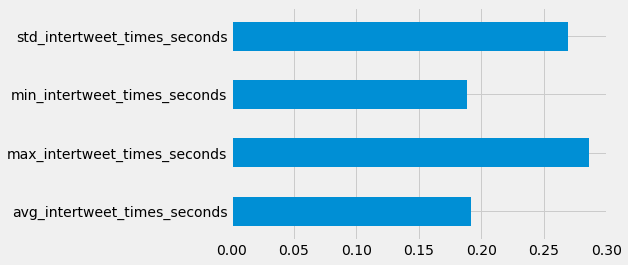

In [15]:
df.corr().loc['label', ['avg_intertweet_times_seconds','max_intertweet_times_seconds','min_intertweet_times_seconds','std_intertweet_times_seconds']].plot.barh()

Plotting correlations of other categorical features with the label

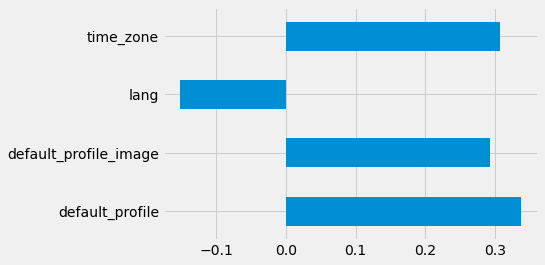

In [16]:
df.corr().loc['label', ['default_profile', 'default_profile_image', 'lang', 'time_zone']].plot.barh()

Plotting correlations of timestamp features with the label

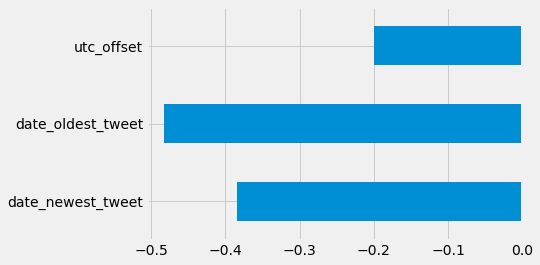

In [17]:
df.corr().loc['label', ['date_newest_tweet', 'date_oldest_tweet', 'utc_offset']].plot.barh()

In [18]:
df.corr().label

active_tweeting_frequency_per_day    0.14111
adjusted_nb_of_uses_of_hashtag       0.21373
adjusted_nb_of_uses_of_mention       0.31592
adjusted_nb_of_uses_of_sources       0.37647
adjusted_nb_of_uses_of_url           0.26377
                                      ...   
tweets_with_hashtags_top_20          0.02210
tweets_with_urls_top_20              0.32871
urls_used_on_average                 0.18033
utc_offset                          -0.19953
label                                1.00000
Name: label, Length: 138, dtype: float64

In [19]:
df.corr()[df.corr().label.abs() > 0.2].label

adjusted_nb_of_uses_of_hashtag    0.21373
adjusted_nb_of_uses_of_mention    0.31592
adjusted_nb_of_uses_of_sources    0.37647
adjusted_nb_of_uses_of_url        0.26377
age                              -0.46032
                                   ...   
time_zone                         0.30792
tweeting_frequency_per_day        0.25224
tweets_with_at_top_20            -0.34716
tweets_with_urls_top_20           0.32871
label                             1.00000
Name: label, Length: 66, dtype: float64

Making 2 groups of feature groups based on correlation with the label

In [20]:
feature_group_1 = df.corr()[df.corr().label.abs() > 0.2].label.index.values
feature_group_2 = df.corr()[df.corr().label.abs() > 0.3].label.index.values

In [21]:
df.utc_offset.isnull().value_counts()

False    582
True     185
Name: utc_offset, dtype: int64

In [22]:
df[df.label == 0].utc_offset.value_counts()

-14400.00000    87
10800.00000     69
-18000.00000    66
-25200.00000    63
7200.00000      51
3600.00000      43
-21600.00000    15
32400.00000     15
-10800.00000    15
39600.00000     11
-7200.00000      7
-36000.00000     7
19800.00000      6
-28800.00000     6
25200.00000      5
36000.00000      3
28800.00000      3
12600.00000      2
18000.00000      2
46800.00000      1
14400.00000      1
0.00000          1
-39600.00000     1
Name: utc_offset, dtype: int64

In [23]:
df[df.label == 1].utc_offset.value_counts()

-28800.00000    15
10800.00000      4
-21600.00000     4
-18000.00000     3
-32400.00000     2
-25200.00000     2
3600.00000       2
-39600.00000     1
-36000.00000     1
7200.00000       1
14400.00000      1
-14400.00000     1
0.00000          1
Name: utc_offset, dtype: int64

Filling null values in the utc_offset with 0

In [24]:
df['utc_offset'] = df['utc_offset'].fillna(0)

Training a Decision Tree Classifier on three different feature groups
1. All features
2. Features with correlation more of the 0.2 with the label
3. Features with correlation more of the 0.3 with the label

In [64]:
train_scores = []
val_scores = []
feat_imp = []

for columns in [df.columns, feature_group_1, feature_group_2]:

    train = df[columns][df.label.notnull()].copy()
    train, val = train_test_split(train, test_size=86, random_state=101)

    X_train, y_train = train.drop('label', axis=1), train['label']
    X_val, y_val = val.drop('label', axis=1), val['label']

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    feat_imp.append(model.feature_importances_)
    train_scores.append(model.score(X_train, y_train))
    val_scores.append(model.score(X_val, y_val))

In [65]:
print(train_scores)
print(val_scores)

[1.0, 1.0, 1.0]
[0.9418604651162791, 0.9534883720930233, 0.9651162790697675]


In [66]:
feat_imp = pd.DataFrame(feat_imp).T
feat_imp.set_index(df.columns[:-1], inplace=True)

Plotting feature importance scores for different feature groups based on the Decision Tree Classifier

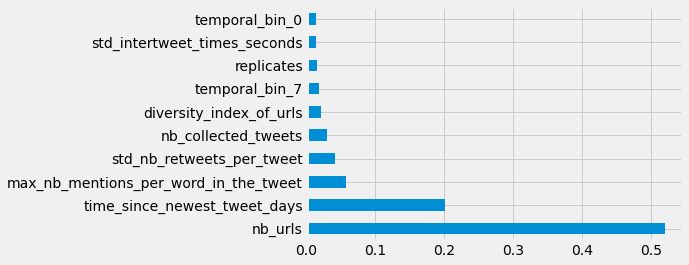

In [68]:
fig, ax = plt.subplots()
feat_imp[0].sort_values(ascending=False)[:10].plot.barh(ax=ax)

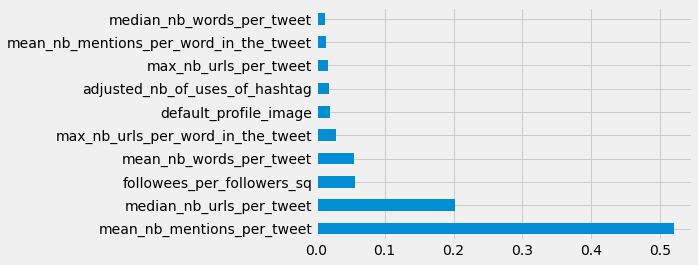

In [69]:
fig, ax = plt.subplots()
feat_imp[1].sort_values(ascending=False)[:10].plot.barh(ax=ax)

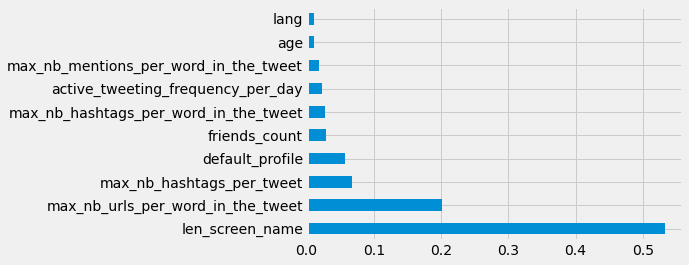

In [70]:
fig, ax = plt.subplots()
feat_imp[2].sort_values(ascending=False)[:10].plot.barh(ax=ax)